In [2]:
from collections import OrderedDict
from urbansim_templates import modelmanager as mm
from urbansim_templates.models import LargeMultinomialLogitStep
from urbansim_templates.models import SmallMultinomialLogitStep
import orca
import os; os.chdir('../')
import warnings; warnings.simplefilter('ignore')

import pandas as pd
# import pandana as pdna
import time
import numpy as np
import matplotlib.pyplot as plt
import os
from functools import reduce

import scipy.stats as st
from scipy.stats import skewnorm

# import matplotlib
# matplotlib.style.use('ggplot')

%matplotlib inline

pd.options.display.max_columns = 80

## Load Data

In [3]:
trips1 = pd.read_csv('/home/emma/ual_model_workspace/spring-2019-models/notebooks-emma/HWtrips_032319.csv')

## Estimate Distribution for Actual H-W trip end times

In [71]:
HW = trips1.HW_trip_ET

In [72]:
# Create models from data
def best_fit_distribution1(data, bins=200, ax=None):
    """Model data by finding best fit distribution to data"""
    # Get histogram of original data
    y, x = np.histogram(data, bins=bins, density=True)
    x = (x + np.roll(x, -1))[:-1] / 2.0

    # Distributions to check
    DISTRIBUTIONS = [  
        st.norm, st.skewnorm,
        st.alpha,st.anglit,st.argus,st.betaprime,st.burr,st.burr12,st.cauchy,
        st.chi,st.chi2,
        st.cosine,
        st.erlang,
        st.exponnorm,
        st.exponweib,st.exponpow,st.f,st.fisk

    ]

    # Best holders
    best_distribution = st.norm
    best_params = (0.0, 1.0)
    best_sse = np.inf

    # Estimate distribution parameters from data
    for distribution in DISTRIBUTIONS:

        # Try to fit the distribution
        try:
            # Ignore warnings from data that can't be fit
            with warnings.catch_warnings():
                warnings.filterwarnings('ignore')

                # fit dist to data
                params = distribution.fit(data)

                # Separate parts of parameters
                arg = params[:-2]
                loc = params[-2]
                scale = params[-1]

                # Calculate fitted PDF and error with fit in distribution
                pdf = distribution.pdf(x, loc=loc, scale=scale, *arg)
                sse = np.sum(np.power(y - pdf, 2.0))

                # if axis pass in add to plot
                try:
                    if ax:
                        pd.Series(pdf, x).plot(ax=ax, label=distribution.name,legend=True)
                    end
                except Exception:
                    pass

                # identify if this distribution is better
                if best_sse > sse > 0:
                    best_distribution = distribution
                    best_params = params
                    best_sse = sse

        except Exception:
            pass

    return (best_distribution.name, best_params)


def make_pdf(dist, params, size=10000):
    """Generate distributions' Probability Distribution Functions """

    # Separate parts of parameters
    arg = params[:-2]
    loc = params[-2]
    scale = params[-1]

    # Get sane start and end points of distribution
    start = dist.ppf(0.001, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.01, loc=loc, scale=scale)
    end = dist.ppf(0.999, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.99, loc=loc, scale=scale)

    # Build PDF and turn into pandas Series
    x = np.linspace(start, end, size)
    y = dist.pdf(x, loc=loc, scale=scale, *arg)
    pdf = pd.Series(y, x)

    return pdf

In [73]:
def best_fit_distribution2(data, bins=200, ax=None):
    """Model data by finding best fit distribution to data"""
    # Get histogram of original data
    y, x = np.histogram(data, bins=bins, density=True)
    x = (x + np.roll(x, -1))[:-1] / 2.0

    # Distributions to check
    DISTRIBUTIONS = [  
        st.gausshyper,
        st.foldnorm,st.weibull_min,st.weibull_max,st.genlogistic,
        st.gennorm,
        st.genextreme,st.gamma,st.gengamma,st.gilbrat,st.gumbel_r,
        st.gumbel_l,st.hypsecant,st.invgamma,st.invgauss]

    # Best holders
    best_distribution = st.foldnorm
    best_params = (0.0, 1.0)
    best_sse = np.inf

    # Estimate distribution parameters from data
    for distribution in DISTRIBUTIONS:

        # Try to fit the distribution
        try:
            # Ignore warnings from data that can't be fit
            with warnings.catch_warnings():
                warnings.filterwarnings('ignore')

                # fit dist to data
                params = distribution.fit(data)

                # Separate parts of parameters
                arg = params[:-2]
                loc = params[-2]
                scale = params[-1]

                # Calculate fitted PDF and error with fit in distribution
                pdf = distribution.pdf(x, loc=loc, scale=scale, *arg)
                sse = np.sum(np.power(y - pdf, 2.0))

                # if axis pass in add to plot
                try:
                    if ax:
                        pd.Series(pdf, x).plot(ax=ax, label=distribution.name,legend=True)
                    end
                except Exception:
                    pass

                # identify if this distribution is better
                if best_sse > sse > 0:
                    best_distribution = distribution
                    best_params = params
                    best_sse = sse

        except Exception:
            pass

    return (best_distribution.name, best_params)

In [74]:
# Create models from data
def best_fit_distribution3(data, bins=200, ax=None):
    """Model data by finding best fit distribution to data"""
    # Get histogram of original data
    y, x = np.histogram(data, bins=bins, density=True)
    x = (x + np.roll(x, -1))[:-1] / 2.0

    # Distributions to check
    DISTRIBUTIONS = [  

        st.johnsonsb, st.johnsonsu,st.ksone,st.logistic,st.loggamma,st.lognorm,st.maxwell,st.mielke,st.nakagami,st.ncx2,st.ncf
        
    ]

    # Best holders
    best_distribution = st.johnsonsu
    best_params = (0.0, 1.0)
    best_sse = np.inf

    # Estimate distribution parameters from data
    for distribution in DISTRIBUTIONS:

        # Try to fit the distribution
        try:
            # Ignore warnings from data that can't be fit
            with warnings.catch_warnings():
                warnings.filterwarnings('ignore')

                # fit dist to data
                params = distribution.fit(data)

                # Separate parts of parameters
                arg = params[:-2]
                loc = params[-2]
                scale = params[-1]

                # Calculate fitted PDF and error with fit in distribution
                pdf = distribution.pdf(x, loc=loc, scale=scale, *arg)
                sse = np.sum(np.power(y - pdf, 2.0))

                # if axis pass in add to plot
                try:
                    if ax:
                        pd.Series(pdf, x).plot(ax=ax, label=distribution.name,legend=True)
                    end
                except Exception:
                    pass

                # identify if this distribution is better
                if best_sse > sse > 0:
                    best_distribution = distribution
                    best_params = params
                    best_sse = sse

        except Exception:
            pass

    return (best_distribution.name, best_params)

In [75]:
# Create models from data
def best_fit_distribution4(data, bins=200, ax=None):
    """Model data by finding best fit distribution to data"""
    # Get histogram of original data
    y, x = np.histogram(data, bins=bins, density=True)
    x = (x + np.roll(x, -1))[:-1] / 2.0

    # Distributions to check
    DISTRIBUTIONS = [  
 
        st.nct,st.pearson3,st.powerlognorm,st.powernorm,
        st.rayleigh,st.rice,st.recipinvgauss,st.t,
        st.vonmises,st.vonmises_line,st.wald,st.weibull_min,st.weibull_max
    
    ]

    # Best holders
    best_distribution = st.t
    best_params = (0.0, 1.0)
    best_sse = np.inf

    # Estimate distribution parameters from data
    for distribution in DISTRIBUTIONS:

        # Try to fit the distribution
        try:
            # Ignore warnings from data that can't be fit
            with warnings.catch_warnings():
                warnings.filterwarnings('ignore')

                # fit dist to data
                params = distribution.fit(data)

                # Separate parts of parameters
                arg = params[:-2]
                loc = params[-2]
                scale = params[-1]

                # Calculate fitted PDF and error with fit in distribution
                pdf = distribution.pdf(x, loc=loc, scale=scale, *arg)
                sse = np.sum(np.power(y - pdf, 2.0))

                # if axis pass in add to plot
                try:
                    if ax:
                        pd.Series(pdf, x).plot(ax=ax, label=distribution.name,legend=True)
                    end
                except Exception:
                    pass

                # identify if this distribution is better
                if best_sse > sse > 0:
                    best_distribution = distribution
                    best_params = params
                    best_sse = sse

        except Exception:
            pass

    return (best_distribution.name, best_params)

In [76]:
# Create models from data
def best_fit_distribution5(data, bins=200, ax=None):
    """Model data by finding best fit distribution to data"""
    # Get histogram of original data
    y, x = np.histogram(data, bins=bins, density=True)
    x = (x + np.roll(x, -1))[:-1] / 2.0

    # Distributions to check
    DISTRIBUTIONS = [  

        st.gompertz,
        st.arcsine,st.beta,st.bradford,st.dgamma,st.dweibull,st.expon,st.fatiguelife,st.foldcauchy,
        st.genpareto,st.genexpon,st.genhalflogistic,st.halfcauchy,st.halflogistic

    ]

    # Best holders
    best_distribution = st.foldcauchy
    best_params = (0.0, 1.0)
    best_sse = np.inf

    # Estimate distribution parameters from data
    for distribution in DISTRIBUTIONS:

        # Try to fit the distribution
        try:
            # Ignore warnings from data that can't be fit
            with warnings.catch_warnings():
                warnings.filterwarnings('ignore')

                # fit dist to data
                params = distribution.fit(data)

                # Separate parts of parameters
                arg = params[:-2]
                loc = params[-2]
                scale = params[-1]

                # Calculate fitted PDF and error with fit in distribution
                pdf = distribution.pdf(x, loc=loc, scale=scale, *arg)
                sse = np.sum(np.power(y - pdf, 2.0))

                # if axis pass in add to plot
                try:
                    if ax:
                        pd.Series(pdf, x).plot(ax=ax, label=distribution.name,legend=True)
                    end
                except Exception:
                    pass

                # identify if this distribution is better
                if best_sse > sse > 0:
                    best_distribution = distribution
                    best_params = params
                    best_sse = sse

        except Exception:
            pass

    return (best_distribution.name, best_params)

In [109]:
# Create models from data
def best_fit_distribution6(data, bins=200, ax=None):
    """Model data by finding best fit distribution to data"""
    # Get histogram of original data
    y, x = np.histogram(data, bins=bins, density=True)
    x = (x + np.roll(x, -1))[:-1] / 2.0

    # Distributions to check
    DISTRIBUTIONS = [  

        st.semicircular,
        st.halfnorm,st.halfgennorm,st.kappa3,st.laplace,st.levy,st.levy_l,st.loglaplace,
        st.lomax,st.pareto,st.powerlaw,st.rdist,st.kappa4,st.invweibull,
        
        st.reciprocal,st.trapz,st.triang,
        st.truncexpon,st.truncnorm,st.tukeylambda,st.wrapcauchy
        
#st.levy_stable,
#         st.crystalball,st.kstwobign        
    ]

    # Best holders
    best_distribution = st.loglaplace
    best_params = (0.0, 1.0)
    best_sse = np.inf

    # Estimate distribution parameters from data
    for distribution in DISTRIBUTIONS:

        # Try to fit the distribution
        try:
            # Ignore warnings from data that can't be fit
            with warnings.catch_warnings():
                warnings.filterwarnings('ignore')

                # fit dist to data
                params = distribution.fit(data)

                # Separate parts of parameters
                arg = params[:-2]
                loc = params[-2]
                scale = params[-1]

                # Calculate fitted PDF and error with fit in distribution
                pdf = distribution.pdf(x, loc=loc, scale=scale, *arg)
                sse = np.sum(np.power(y - pdf, 2.0))

                # if axis pass in add to plot
                try:
                    if ax:
                        pd.Series(pdf, x).plot(ax=ax, label=distribution.name,legend=True)
                    end
                except Exception:
                    pass

                # identify if this distribution is better
                if best_sse > sse > 0:
                    best_distribution = distribution
                    best_params = params
                    best_sse = sse

        except Exception:
            pass

    return (best_distribution.name, best_params)

In [78]:
def make_pdf(dist, params, size=10000):
    """Generate distributions' Probability Distribution Functions """

    # Separate parts of parameters
    arg = params[:-2]
    loc = params[-2]
    scale = params[-1]

    # Get sane start and end points of distribution
    start = dist.ppf(0.001, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.01, loc=loc, scale=scale)
    end = dist.ppf(0.999, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.99, loc=loc, scale=scale)

    # Build PDF and turn into pandas Series
    x = np.linspace(start, end, size)
    y = dist.pdf(x, loc=loc, scale=scale, *arg)
    pdf = pd.Series(y, x)

    return pdf

In [79]:
#For HW
def best_fit_distribution7(data, bins=200, ax=None):
    """Model data by finding best fit distribution to data"""
    # Get histogram of original data
    y, x = np.histogram(data, bins=bins, density=True)
    x = (x + np.roll(x, -1))[:-1] / 2.0

    # Distributions to check
    DISTRIBUTIONS = [  
        
#         st.loglaplace,
        st.burr12, st.fisk, st.skewnorm, st.johnsonsu, 
#         st.dweibull, st.gennorm,
        st.laplace, st.t, st.nct
        
    ]

    # Best holders
    best_distribution = st.norm
    best_params = (0.0, 1.0)
    best_sse = np.inf

    # Estimate distribution parameters from data
    for distribution in DISTRIBUTIONS:

        # Try to fit the distribution
        try:
            # Ignore warnings from data that can't be fit
            with warnings.catch_warnings():
                warnings.filterwarnings('ignore')

                # fit dist to data
                params = distribution.fit(data)

                # Separate parts of parameters
                arg = params[:-2]
                loc = params[-2]
                scale = params[-1]

                # Calculate fitted PDF and error with fit in distribution
                pdf = distribution.pdf(x, loc=loc, scale=scale, *arg)
                sse = np.sum(np.power(y - pdf, 2.0))

                # if axis pass in add to plot
                try:
                    if ax:
                        pd.Series(pdf, x).plot(ax=ax, label=distribution.name,legend=True)
                    end
                except Exception:
                    pass

                # identify if this distribution is better
                if best_sse > sse > 0:
                    best_distribution = distribution
                    best_params = params
                    best_sse = sse

        except Exception:
            pass

    return (best_distribution.name, best_params)

johnsonsu(a=-0.71, b=1.00, loc=7.12, scale=1.31)


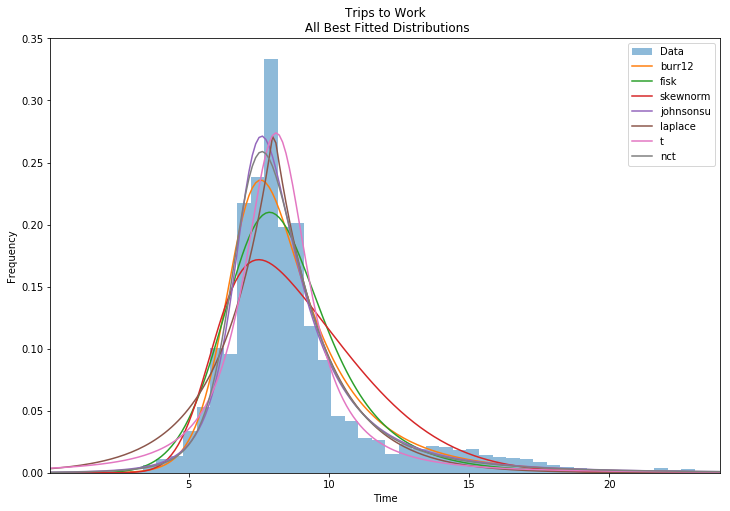

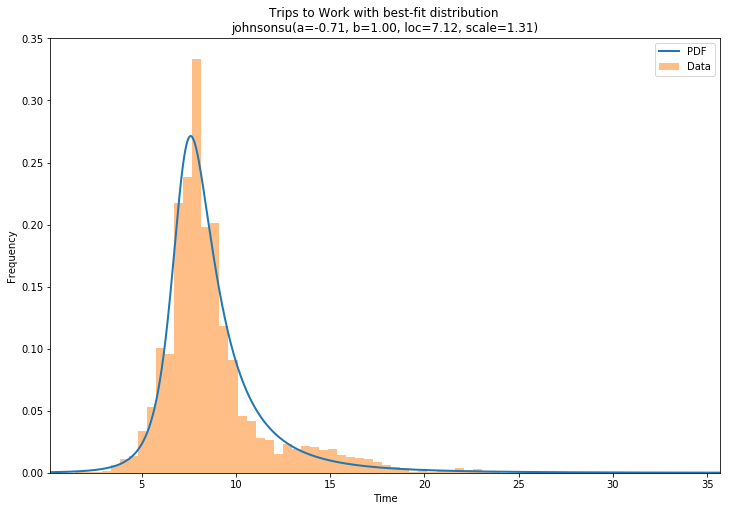

In [80]:
# %matplotlib notebook

# # Load data
data = HW

# Plot for comparison
plt.figure(figsize=(12,8))
ax = data.plot(kind='hist', bins=50, density=True, alpha=0.5, label='Data', legend=True
               #, color=plt.rcParams['axes.color_cycle'][1]
              )
# Save plot limits
dataYLim = ax.get_ylim()

# Find best fit distribution
best_fit_name, best_fir_paramms = best_fit_distribution7(data, 200, ax)
best_dist = getattr(st, best_fit_name)

# Update plots
ax.set_ylim(dataYLim)
ax.set_title(u'Trips to Work\n All Best Fitted Distributions')
ax.set_xlabel(u'Time')
ax.set_ylabel('Frequency')

# Make PDF
pdf = make_pdf(best_dist, best_fir_paramms)

# Display
plt.figure(figsize=(12,8))
ax = pdf.plot(lw=2, label='PDF', legend=True)
data.plot(kind='hist', bins=50, density=True, alpha=0.5, label='Data', legend=True, ax=ax)

param_names = (best_dist.shapes + ', loc, scale').split(', ') if best_dist.shapes else ['loc', 'scale']
param_str = ', '.join(['{}={:0.2f}'.format(k,v) for k,v in zip(param_names, best_fir_paramms)])
dist_str = '{}({})'.format(best_fit_name, param_str)

ax.set_title(u'Trips to Work with best-fit distribution \n' + dist_str)
ax.set_xlabel(u'Time')
ax.set_ylabel('Frequency')

print (dist_str)

## Estimate distributions for Actual work dwell times

In [91]:
dwell_exact = trips1.work_dwell

In [95]:
dwell0 = trips1['work_dwell'].loc[trips1['TOD'].isin([0])]
dwell1 = trips1['work_dwell'].loc[trips1['TOD'].isin([1])]
dwell2 = trips1['work_dwell'].loc[trips1['TOD'].isin([2])]
dwell3 = trips1['work_dwell'].loc[trips1['TOD'].isin([3])]
dwell4 = trips1['work_dwell'].loc[trips1['TOD'].isin([4])]

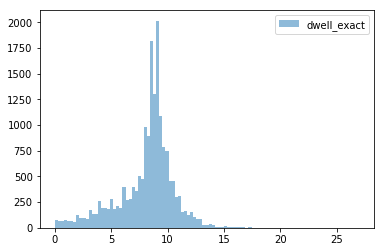

<Figure size 2880x1440 with 0 Axes>

In [99]:
x = dwell_exact

bins = np.linspace(0, 27, 100)

plt.hist(x, bins, alpha=0.5, label='dwell_exact')
plt.legend(loc='upper right')
plt.figure(figsize=(40,20))
plt.show()

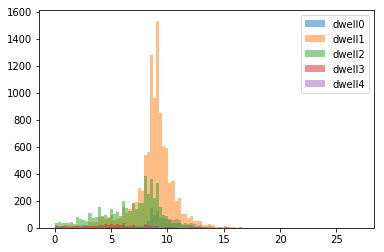

<Figure size 2880x1440 with 0 Axes>

In [97]:
v = dwell0
w = dwell1
x = dwell2
y = dwell3
z = dwell4

bins = np.linspace(0, 27, 100)

plt.hist(v, bins, alpha=0.5, label='dwell0')
plt.hist(w, bins, alpha=0.5, label='dwell1')
plt.hist(x, bins, alpha=0.5, label='dwell2')
plt.hist(y, bins, alpha=0.5, label='dwell3')
plt.hist(z, bins, alpha=0.5, label='dwell4')
plt.legend(loc='upper right')
plt.figure(figsize=(40,20))
plt.show()

In [167]:
#For HW
def best_fit_distribution12(data, bins=200, ax=None):
    """Model data by finding best fit distribution to data"""
    # Get histogram of original data
    y, x = np.histogram(data, bins=bins, density=True)
    x = (x + np.roll(x, -1))[:-1] / 2.0

    # Distributions to check
    DISTRIBUTIONS = [  
        
#         st.foldcauchy,
#         st.cauchy,
#         st.gennorm,
        st.johnsonsu, 
#         st.burr,st.f,
#         st.genlogistic,st.invgauss,
#         st.t, 
#         st.tukeylambda, st.loglaplace
        
    ]

    # Best holders
    best_distribution = st.norm
    best_params = (0.0, 1.0)
    best_sse = np.inf

    # Estimate distribution parameters from data
    for distribution in DISTRIBUTIONS:

        # Try to fit the distribution
        try:
            # Ignore warnings from data that can't be fit
            with warnings.catch_warnings():
                warnings.filterwarnings('ignore')

                # fit dist to data
                params = distribution.fit(data)

                # Separate parts of parameters
                arg = params[:-2]
                loc = params[-2]
                scale = params[-1]

                # Calculate fitted PDF and error with fit in distribution
                pdf = distribution.pdf(x, loc=loc, scale=scale, *arg)
                sse = np.sum(np.power(y - pdf, 2.0))

                # if axis pass in add to plot
                try:
                    if ax:
                        pd.Series(pdf, x).plot(ax=ax, label=distribution.name,legend=True)
                    end
                except Exception:
                    pass

                # identify if this distribution is better
                if best_sse > sse > 0:
                    best_distribution = distribution
                    best_params = params
                    best_sse = sse

        except Exception:
            pass

    return (best_distribution.name, best_params)

johnsonsu(a=0.49, b=0.94, loc=9.29, scale=1.26)


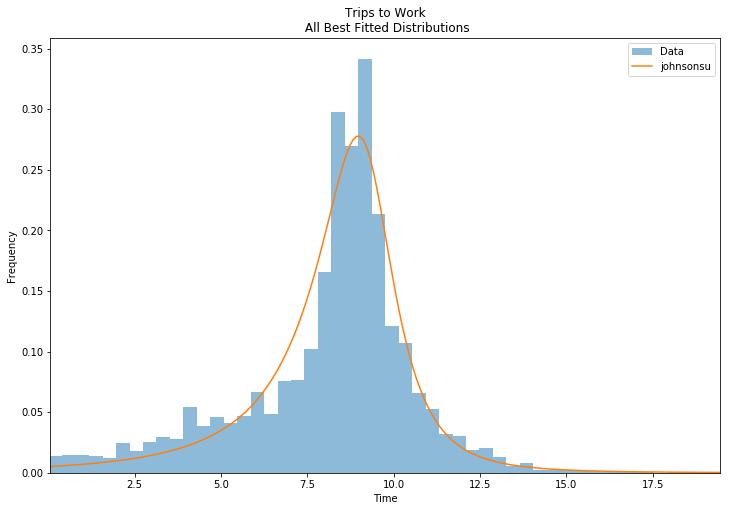

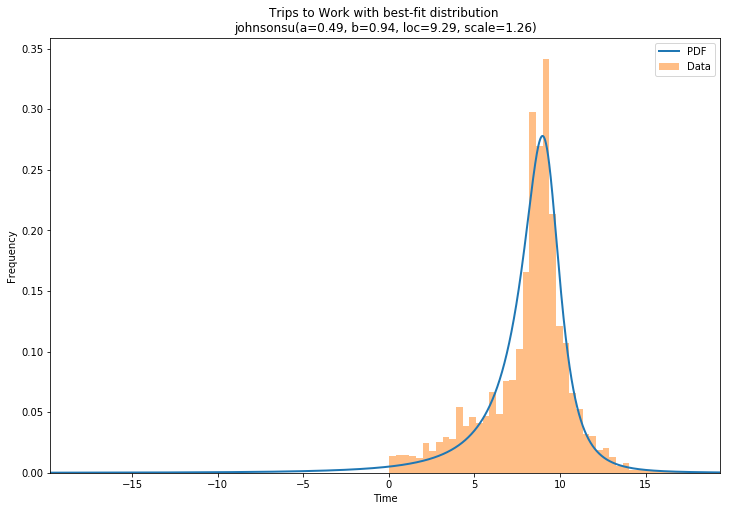

In [168]:
# # Load data
data = dwell_exact

# Plot for comparison
plt.figure(figsize=(12,8))
ax = data.plot(kind='hist', bins=50, density=True, alpha=0.5, label='Data', legend=True
               #, color=plt.rcParams['axes.color_cycle'][1]
              )
# Save plot limits
dataYLim = ax.get_ylim()

# Find best fit distribution
best_fit_name, best_fir_paramms = best_fit_distribution12(data, 200, ax)
best_dist = getattr(st, best_fit_name)

# Update plots
ax.set_ylim(dataYLim)
ax.set_title(u'Trips to Work\n All Best Fitted Distributions')
ax.set_xlabel(u'Time')
ax.set_ylabel('Frequency')

# Make PDF
pdf = make_pdf(best_dist, best_fir_paramms)

# Display
plt.figure(figsize=(12,8))
ax = pdf.plot(lw=2, label='PDF', legend=True)
data.plot(kind='hist', bins=50, density=True, alpha=0.5, label='Data', legend=True, ax=ax)

param_names = (best_dist.shapes + ', loc, scale').split(', ') if best_dist.shapes else ['loc', 'scale']
param_str = ', '.join(['{}={:0.2f}'.format(k,v) for k,v in zip(param_names, best_fir_paramms)])
dist_str = '{}({})'.format(best_fit_name, param_str)

ax.set_title(u'Trips to Work with best-fit distribution \n' + dist_str)
ax.set_xlabel(u'Time')
ax.set_ylabel('Frequency')

print (dist_str)

In [119]:
#For HW
def best_fit_distribution8(data, bins=200, ax=None):
    """Model data by finding best fit distribution to data"""
    # Get histogram of original data
    y, x = np.histogram(data, bins=bins, density=True)
    x = (x + np.roll(x, -1))[:-1] / 2.0

    # Distributions to check
    DISTRIBUTIONS = [  
        
        st.cauchy,st.fisk,
        st.hypsecant,st.gennorm,
        st.johnsonsu, 
        st.t, 
        st.foldcauchy,
        st.tukeylambda
        
    ]

    # Best holders
    best_distribution = st.norm
    best_params = (0.0, 1.0)
    best_sse = np.inf

    # Estimate distribution parameters from data
    for distribution in DISTRIBUTIONS:

        # Try to fit the distribution
        try:
            # Ignore warnings from data that can't be fit
            with warnings.catch_warnings():
                warnings.filterwarnings('ignore')

                # fit dist to data
                params = distribution.fit(data)

                # Separate parts of parameters
                arg = params[:-2]
                loc = params[-2]
                scale = params[-1]

                # Calculate fitted PDF and error with fit in distribution
                pdf = distribution.pdf(x, loc=loc, scale=scale, *arg)
                sse = np.sum(np.power(y - pdf, 2.0))

                # if axis pass in add to plot
                try:
                    if ax:
                        pd.Series(pdf, x).plot(ax=ax, label=distribution.name,legend=True)
                    end
                except Exception:
                    pass

                # identify if this distribution is better
                if best_sse > sse > 0:
                    best_distribution = distribution
                    best_params = params
                    best_sse = sse

        except Exception:
            pass

    return (best_distribution.name, best_params)

johnsonsu(a=-0.16, b=1.09, loc=9.37, scale=1.54)


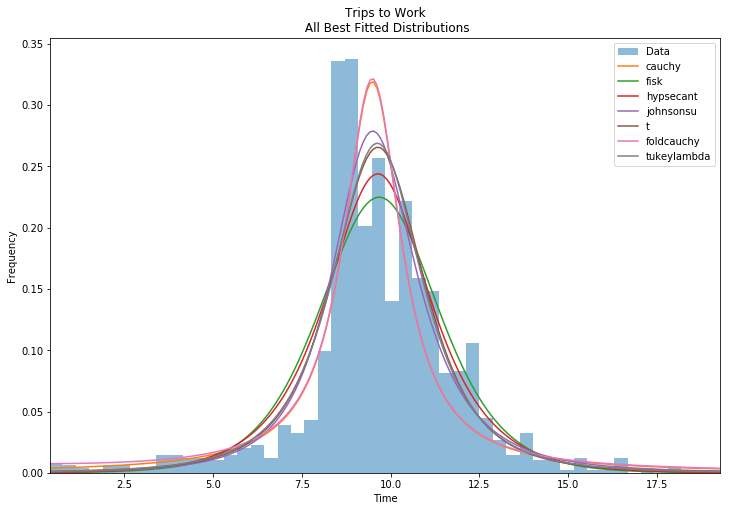

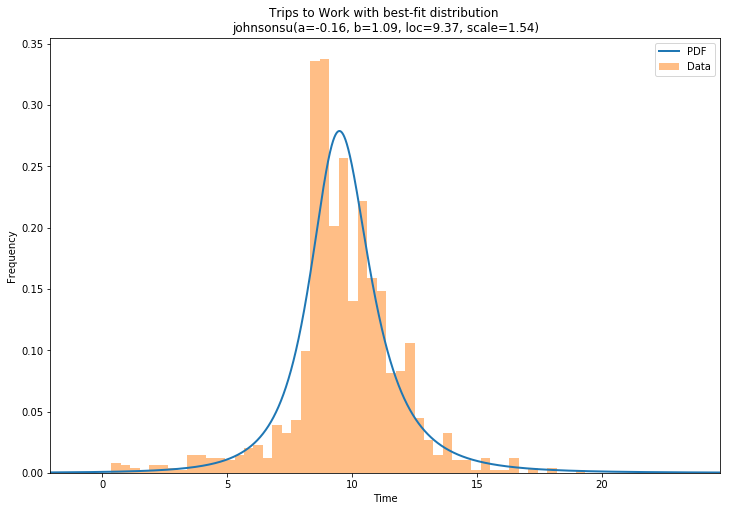

In [112]:
# # Load data
data = dwell0

# Plot for comparison
plt.figure(figsize=(12,8))
ax = data.plot(kind='hist', bins=50, density=True, alpha=0.5, label='Data', legend=True
               #, color=plt.rcParams['axes.color_cycle'][1]
              )
# Save plot limits
dataYLim = ax.get_ylim()

# Find best fit distribution
best_fit_name, best_fir_paramms = best_fit_distribution8(data, 200, ax)
best_dist = getattr(st, best_fit_name)

# Update plots
ax.set_ylim(dataYLim)
ax.set_title(u'Trips to Work\n All Best Fitted Distributions')
ax.set_xlabel(u'Time')
ax.set_ylabel('Frequency')

# Make PDF
pdf = make_pdf(best_dist, best_fir_paramms)

# Display
plt.figure(figsize=(12,8))
ax = pdf.plot(lw=2, label='PDF', legend=True)
data.plot(kind='hist', bins=50, density=True, alpha=0.5, label='Data', legend=True, ax=ax)

param_names = (best_dist.shapes + ', loc, scale').split(', ') if best_dist.shapes else ['loc', 'scale']
param_str = ', '.join(['{}={:0.2f}'.format(k,v) for k,v in zip(param_names, best_fir_paramms)])
dist_str = '{}({})'.format(best_fit_name, param_str)

ax.set_title(u'Trips to Work with best-fit distribution \n' + dist_str)
ax.set_xlabel(u'Time')
ax.set_ylabel('Frequency')

print (dist_str)

foldcauchy(c=12.34, loc=-0.05, scale=0.73)


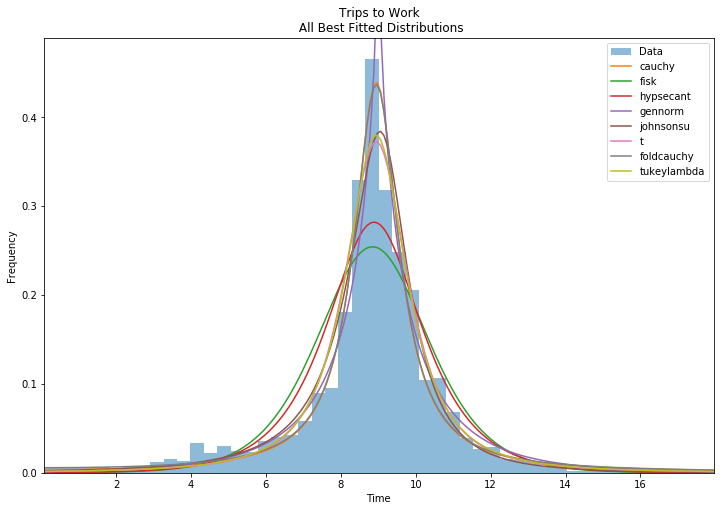

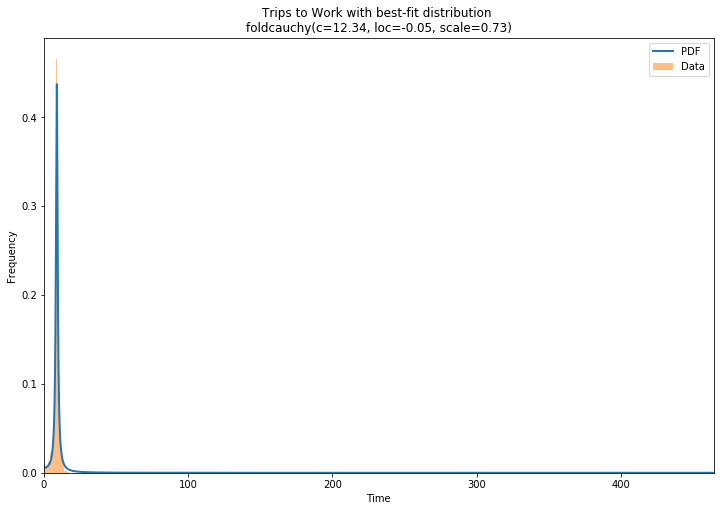

In [120]:
# # Load data
data = dwell1

# Plot for comparison
plt.figure(figsize=(12,8))
ax = data.plot(kind='hist', bins=50, density=True, alpha=0.5, label='Data', legend=True
               #, color=plt.rcParams['axes.color_cycle'][1]
              )
# Save plot limits
dataYLim = ax.get_ylim()

# Find best fit distribution
best_fit_name, best_fir_paramms = best_fit_distribution8(data, 200, ax)
best_dist = getattr(st, best_fit_name)

# Update plots
ax.set_ylim(dataYLim)
ax.set_title(u'Trips to Work\n All Best Fitted Distributions')
ax.set_xlabel(u'Time')
ax.set_ylabel('Frequency')

# Make PDF
pdf = make_pdf(best_dist, best_fir_paramms)

# Display
plt.figure(figsize=(12,8))
ax = pdf.plot(lw=2, label='PDF', legend=True)
data.plot(kind='hist', bins=50, density=True, alpha=0.5, label='Data', legend=True, ax=ax)

param_names = (best_dist.shapes + ', loc, scale').split(', ') if best_dist.shapes else ['loc', 'scale']
param_str = ', '.join(['{}={:0.2f}'.format(k,v) for k,v in zip(param_names, best_fir_paramms)])
dist_str = '{}({})'.format(best_fit_name, param_str)

ax.set_title(u'Trips to Work with best-fit distribution \n' + dist_str)
ax.set_xlabel(u'Time')
ax.set_ylabel('Frequency')

print (dist_str)

In [127]:
#For HW
def best_fit_distribution9(data, bins=200, ax=None):
    """Model data by finding best fit distribution to data"""
    # Get histogram of original data
    y, x = np.histogram(data, bins=bins, density=True)
    x = (x + np.roll(x, -1))[:-1] / 2.0

    # Distributions to check
    DISTRIBUTIONS = [  
        
        st.burr, st.skewnorm,
        st.genlogistic,
        st.mielke,
        st.gompertz
        
    ]

    # Best holders
    best_distribution = st.norm
    best_params = (0.0, 1.0)
    best_sse = np.inf

    # Estimate distribution parameters from data
    for distribution in DISTRIBUTIONS:

        # Try to fit the distribution
        try:
            # Ignore warnings from data that can't be fit
            with warnings.catch_warnings():
                warnings.filterwarnings('ignore')

                # fit dist to data
                params = distribution.fit(data)

                # Separate parts of parameters
                arg = params[:-2]
                loc = params[-2]
                scale = params[-1]

                # Calculate fitted PDF and error with fit in distribution
                pdf = distribution.pdf(x, loc=loc, scale=scale, *arg)
                sse = np.sum(np.power(y - pdf, 2.0))

                # if axis pass in add to plot
                try:
                    if ax:
                        pd.Series(pdf, x).plot(ax=ax, label=distribution.name,legend=True)
                    end
                except Exception:
                    pass

                # identify if this distribution is better
                if best_sse > sse > 0:
                    best_distribution = distribution
                    best_params = params
                    best_sse = sse

        except Exception:
            pass

    return (best_distribution.name, best_params)

genlogistic(c=0.31, loc=8.97, scale=0.79)


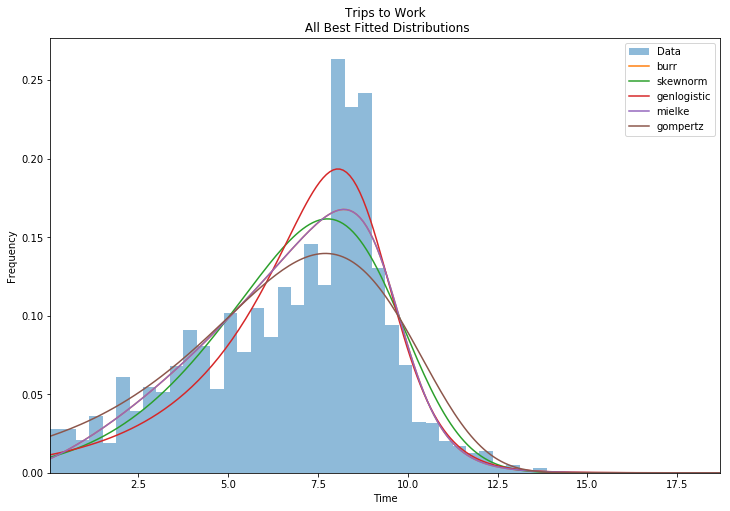

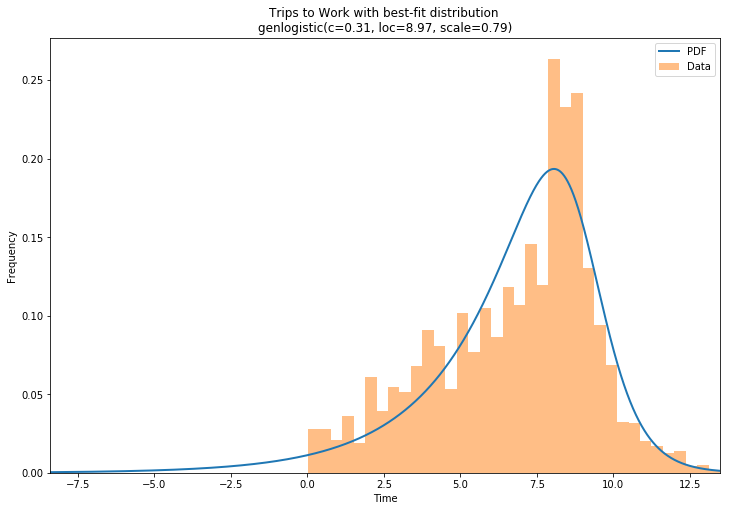

In [128]:
# # Load data
data = dwell2

# Plot for comparison
plt.figure(figsize=(12,8))
ax = data.plot(kind='hist', bins=50, density=True, alpha=0.5, label='Data', legend=True
               #, color=plt.rcParams['axes.color_cycle'][1]
              )
# Save plot limits
dataYLim = ax.get_ylim()

# Find best fit distribution
best_fit_name, best_fir_paramms = best_fit_distribution9(data, 200, ax)
best_dist = getattr(st, best_fit_name)

# Update plots
ax.set_ylim(dataYLim)
ax.set_title(u'Trips to Work\n All Best Fitted Distributions')
ax.set_xlabel(u'Time')
ax.set_ylabel('Frequency')

# Make PDF
pdf = make_pdf(best_dist, best_fir_paramms)

# Display
plt.figure(figsize=(12,8))
ax = pdf.plot(lw=2, label='PDF', legend=True)
data.plot(kind='hist', bins=50, density=True, alpha=0.5, label='Data', legend=True, ax=ax)

param_names = (best_dist.shapes + ', loc, scale').split(', ') if best_dist.shapes else ['loc', 'scale']
param_str = ', '.join(['{}={:0.2f}'.format(k,v) for k,v in zip(param_names, best_fir_paramms)])
dist_str = '{}({})'.format(best_fit_name, param_str)

ax.set_title(u'Trips to Work with best-fit distribution \n' + dist_str)
ax.set_xlabel(u'Time')
ax.set_ylabel('Frequency')

print (dist_str)

In [138]:
#For HW
def best_fit_distribution10(data, bins=200, ax=None):
    """Model data by finding best fit distribution to data"""
    # Get histogram of original data
    y, x = np.histogram(data, bins=bins, density=True)
    x = (x + np.roll(x, -1))[:-1] / 2.0

    # Distributions to check
    DISTRIBUTIONS = [  
        
#         st.gennorm,
        st.exponnorm,
        st.foldnorm, st.gumbel_l,
        st.logistic,
        st.t,
        st.foldcauchy,
        st.tukeylambda,st.skewnorm
        
    ]

    # Best holders
    best_distribution = st.norm
    best_params = (0.0, 1.0)
    best_sse = np.inf

    # Estimate distribution parameters from data
    for distribution in DISTRIBUTIONS:

        # Try to fit the distribution
        try:
            # Ignore warnings from data that can't be fit
            with warnings.catch_warnings():
                warnings.filterwarnings('ignore')

                # fit dist to data
                params = distribution.fit(data)

                # Separate parts of parameters
                arg = params[:-2]
                loc = params[-2]
                scale = params[-1]

                # Calculate fitted PDF and error with fit in distribution
                pdf = distribution.pdf(x, loc=loc, scale=scale, *arg)
                sse = np.sum(np.power(y - pdf, 2.0))

                # if axis pass in add to plot
                try:
                    if ax:
                        pd.Series(pdf, x).plot(ax=ax, label=distribution.name,legend=True)
                    end
                except Exception:
                    pass

                # identify if this distribution is better
                if best_sse > sse > 0:
                    best_distribution = distribution
                    best_params = params
                    best_sse = sse

        except Exception:
            pass

    return (best_distribution.name, best_params)

foldnorm(c=1.70, loc=0.05, scale=3.15)


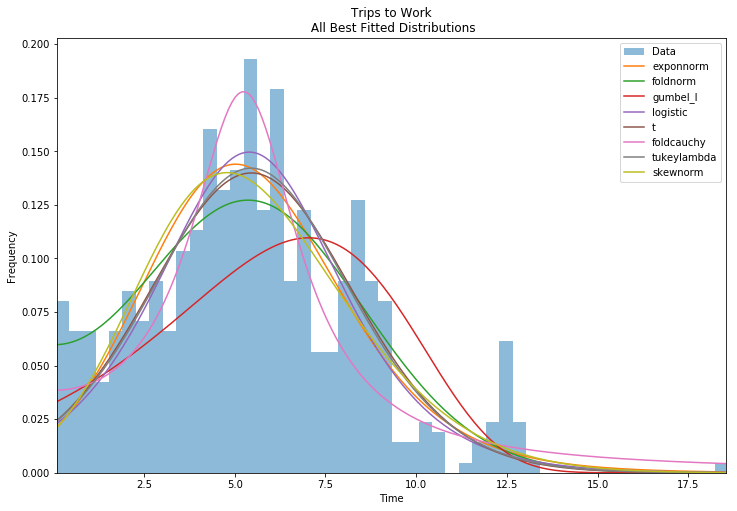

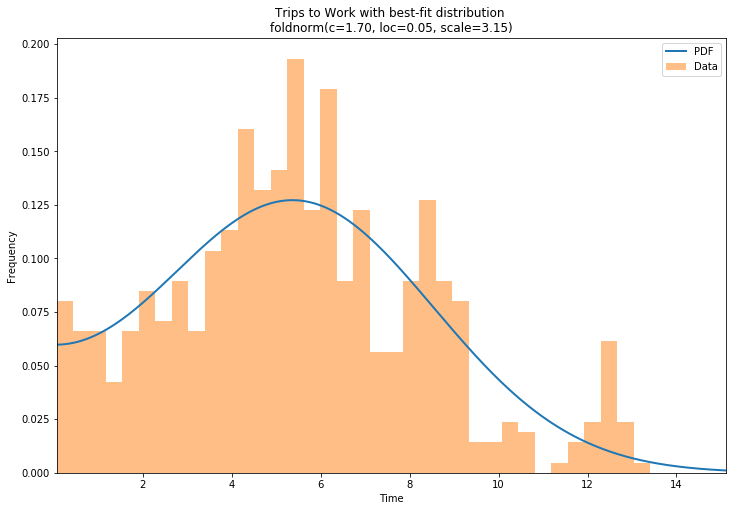

In [139]:
# # Load data
data = dwell3

# Plot for comparison
plt.figure(figsize=(12,8))
ax = data.plot(kind='hist', bins=50, density=True, alpha=0.5, label='Data', legend=True
               #, color=plt.rcParams['axes.color_cycle'][1]
              )
# Save plot limits
dataYLim = ax.get_ylim()

# Find best fit distribution
best_fit_name, best_fir_paramms = best_fit_distribution10(data, 200, ax)
best_dist = getattr(st, best_fit_name)

# Update plots
ax.set_ylim(dataYLim)
ax.set_title(u'Trips to Work\n All Best Fitted Distributions')
ax.set_xlabel(u'Time')
ax.set_ylabel('Frequency')

# Make PDF
pdf = make_pdf(best_dist, best_fir_paramms)

# Display
plt.figure(figsize=(12,8))
ax = pdf.plot(lw=2, label='PDF', legend=True)
data.plot(kind='hist', bins=50, density=True, alpha=0.5, label='Data', legend=True, ax=ax)

param_names = (best_dist.shapes + ', loc, scale').split(', ') if best_dist.shapes else ['loc', 'scale']
param_str = ', '.join(['{}={:0.2f}'.format(k,v) for k,v in zip(param_names, best_fir_paramms)])
dist_str = '{}({})'.format(best_fit_name, param_str)

ax.set_title(u'Trips to Work with best-fit distribution \n' + dist_str)
ax.set_xlabel(u'Time')
ax.set_ylabel('Frequency')

print (dist_str)

In [146]:
#For HW
def best_fit_distribution11(data, bins=200, ax=None):
    """Model data by finding best fit distribution to data"""
    # Get histogram of original data
    y, x = np.histogram(data, bins=bins, density=True)
    x = (x + np.roll(x, -1))[:-1] / 2.0

    # Distributions to check
    DISTRIBUTIONS = [  
        
        st.cauchy,
        st.gennorm,st.genlogistic, st.invgauss,
        st.johnsonsu,
        st.powernorm,
        st.foldcauchy,
        st.loglaplace
        
    ]

    # Best holders
    best_distribution = st.norm
    best_params = (0.0, 1.0)
    best_sse = np.inf

    # Estimate distribution parameters from data
    for distribution in DISTRIBUTIONS:

        # Try to fit the distribution
        try:
            # Ignore warnings from data that can't be fit
            with warnings.catch_warnings():
                warnings.filterwarnings('ignore')

                # fit dist to data
                params = distribution.fit(data)

                # Separate parts of parameters
                arg = params[:-2]
                loc = params[-2]
                scale = params[-1]

                # Calculate fitted PDF and error with fit in distribution
                pdf = distribution.pdf(x, loc=loc, scale=scale, *arg)
                sse = np.sum(np.power(y - pdf, 2.0))

                # if axis pass in add to plot
                try:
                    if ax:
                        pd.Series(pdf, x).plot(ax=ax, label=distribution.name,legend=True)
                    end
                except Exception:
                    pass

                # identify if this distribution is better
                if best_sse > sse > 0:
                    best_distribution = distribution
                    best_params = params
                    best_sse = sse

        except Exception:
            pass

    return (best_distribution.name, best_params)

gennorm(beta=0.71, loc=8.42, scale=1.40)


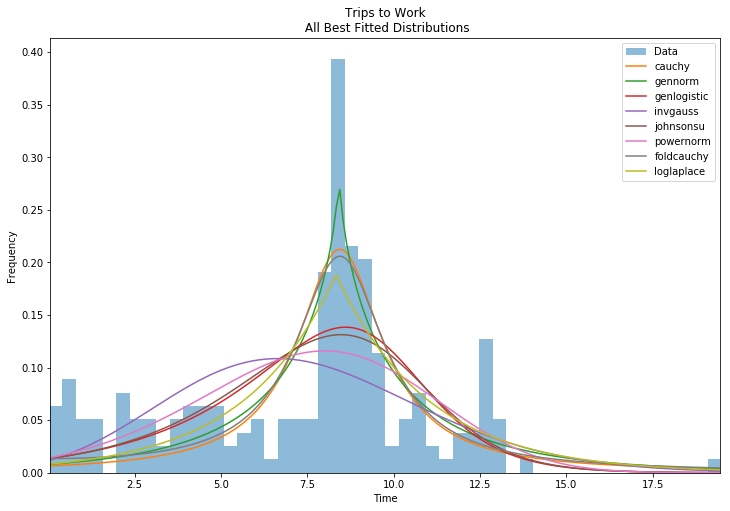

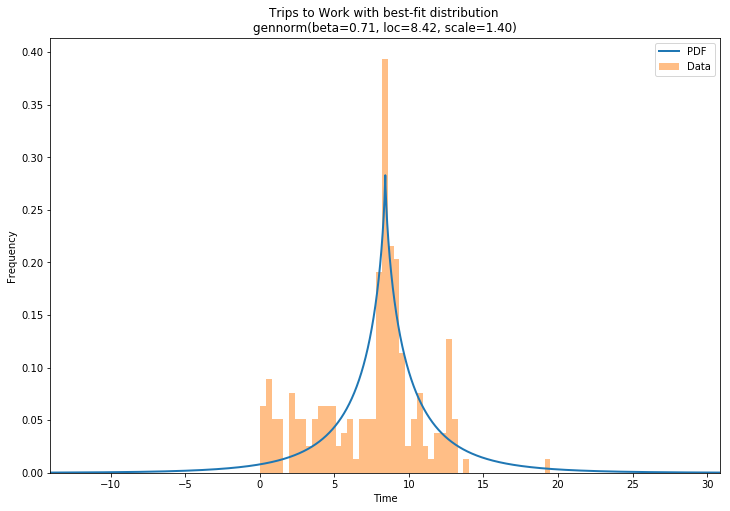

In [147]:
# # Load data
data = dwell4

# Plot for comparison
plt.figure(figsize=(12,8))
ax = data.plot(kind='hist', bins=50, density=True, alpha=0.5, label='Data', legend=True
               #, color=plt.rcParams['axes.color_cycle'][1]
              )
# Save plot limits
dataYLim = ax.get_ylim()

# Find best fit distribution
best_fit_name, best_fir_paramms = best_fit_distribution11(data, 200, ax)
best_dist = getattr(st, best_fit_name)

# Update plots
ax.set_ylim(dataYLim)
ax.set_title(u'Trips to Work\n All Best Fitted Distributions')
ax.set_xlabel(u'Time')
ax.set_ylabel('Frequency')

# Make PDF
pdf = make_pdf(best_dist, best_fir_paramms)

# Display
plt.figure(figsize=(12,8))
ax = pdf.plot(lw=2, label='PDF', legend=True)
data.plot(kind='hist', bins=50, density=True, alpha=0.5, label='Data', legend=True, ax=ax)

param_names = (best_dist.shapes + ', loc, scale').split(', ') if best_dist.shapes else ['loc', 'scale']
param_str = ', '.join(['{}={:0.2f}'.format(k,v) for k,v in zip(param_names, best_fir_paramms)])
dist_str = '{}({})'.format(best_fit_name, param_str)

ax.set_title(u'Trips to Work with best-fit distribution \n' + dist_str)
ax.set_xlabel(u'Time')
ax.set_ylabel('Frequency')

print (dist_str)

## Use distribution to simulate synthetic home-work trip end times

In [ ]:
obs = pd.read_csv('/home/emma/ual_model_workspace/spring-2019-models/notebooks-emma/synthetic_032319.csv')

In [81]:
obs['HW_ET'] = st.johnsonsu.rvs(size= len(obs), a=-0.71, b=1.00, loc=7.12, scale=1.31)

In [84]:
while len(obs.loc[(obs['TOD'] == 0) & ((obs['HW_ET'] < 3) | (obs['HW_ET'] >= 6))]) > 0:
    obs.loc[(obs['TOD'] == 0) &  ((obs['HW_ET'] < 3) | (obs['HW_ET'] >= 6)),
           'HW_ET'] = st.johnsonsu.rvs(size= len(obs.loc[(obs['TOD'] == 0) & ((obs['HW_ET'] < 3) | (obs['HW_ET'] >= 6))]), a=-0.71, b=1.00, loc=7.12, scale=1.31)

In [85]:
while len(obs.loc[(obs['TOD'] == 1) & ((obs['HW_ET'] < 6) | (obs['HW_ET'] >= 9))]) > 0:
    obs.loc[ (obs['TOD'] == 1) & ((obs['HW_ET'] < 6) | (obs['HW_ET'] >= 9)),
           'HW_ET'] = st.johnsonsu.rvs(size= len(obs.loc[(obs['TOD'] == 1) & ((obs['HW_ET'] < 6) | (obs['HW_ET'] >= 9))]), a=-0.71, b=1.00, loc=7.12, scale=1.31)

In [86]:
while len(obs.loc[(obs['TOD'] == 2) & ((obs['HW_ET'] < 9) | (obs['HW_ET'] >= 15.5))]) > 0:
    obs.loc[(obs['TOD'] == 2) & ((obs['HW_ET'] < 9) | (obs['HW_ET'] >= 15.5)),
           'HW_ET'] = st.johnsonsu.rvs(size= len(obs.loc[(obs['TOD'] == 2) & ((obs['HW_ET'] < 9) | (obs['HW_ET'] >= 15.5))]), a=-0.71, b=1.00, loc=7.12, scale=1.31)

In [87]:
while len(obs.loc[(obs['TOD'] == 3) & ((obs['HW_ET'] < 15.5) | (obs['HW_ET'] >= 18.5))]) > 0:
    obs.loc[(obs['TOD'] == 3) & ((obs['HW_ET'] < 15.5) | (obs['HW_ET'] >= 18.5)),
           'HW_ET'] = st.johnsonsu.rvs(size= len(obs.loc[(obs['TOD'] == 3) & ((obs['HW_ET'] < 15.5) | (obs['HW_ET'] >= 18.5))]), a=-0.71, b=1.00, loc=7.12, scale=1.31)

In [89]:
while len(obs.loc[(obs['TOD'] == 4) & ((obs['HW_ET'] < 18.5) | (obs['HW_ET'] >= 27))]) > 0:
    obs.loc[(obs['TOD'] == 4) & ((obs['HW_ET'] < 18.5) | (obs['HW_ET'] >= 27)),
           'HW_ET'] = st.johnsonsu.rvs(size= len(obs.loc[(obs['TOD'] == 4) & ((obs['HW_ET'] < 18.5) | (obs['HW_ET'] >= 27))]), a=-0.71, b=1.00, loc=7.12, scale=1.31)

In [90]:
obs.loc[ (obs['HW_ET'] > 24),
    'HW_ET'] = obs['HW_ET'] - 24

## Assign synthetic work dwell times from distribution

In [169]:
# need to create a dwell_exact column first

# obs.loc[obs['TOD'].isin([0]),'dwell_work'] = st.johnsonsu.rvs(size= len(obs['TOD'].isin([0])), a=-0.16, b=1.09, loc=9.37, scale=1.54)
# obs.loc[obs['TOD'].isin([1]),'dwell_work'] = st.foldcauchy.rvs(size= len(obs['TOD'].isin([1])), c=12.34, loc=-0.05, scale=0.73)
# obs.loc[obs['TOD'].isin([2]),'dwell_work'] = st.genlogistic.rvs(size= len(obs['TOD'].isin([2])), c=0.31, loc=8.97, scale=0.79)
# obs.loc[obs['TOD'].isin([3]),'dwell_work'] = st.foldnorm.rvs(size= len(obs['TOD'].isin([3])), c=1.70, loc=0.05, scale=3.15)
# obs.loc[obs['TOD'].isin([4]),'dwell_work'] = st.gennorm.rvs(size= len(obs['TOD'].isin([4])), beta=0.71, loc=8.42, scale=1.40)

In [ ]:
tripsIII['dwell_work'] = (
    ((tripsIII.work_dwell.between(0,4.5,inclusive = False)) | (tripsIII.work_dwell==0))*1 +
    ((tripsIII.work_dwell.between(4.5,7.75,inclusive = False)) | (tripsIII.work_dwell==4.5))*2 +
    ((tripsIII.work_dwell.between(7.75,9.0,inclusive = False)) | (tripsIII.work_dwell==7.75))*3 +
    ((tripsIII.work_dwell.between(9.0,10.5,inclusive = False)) | (tripsIII.work_dwell==9.0))*4 +
    ((tripsIII.work_dwell>=10.5))*5)

In [170]:
obs['dwell_exact'] = st.johnsonsu.rvs(size= len(obs), a=0.49, b=0.94, loc=9.29, scale=1.26)

In [171]:
while len(obs.loc[(obs['dwell_work'] == 1) & (obs['dwell_exact'] >= 4.5)]) > 0:
    obs.loc[(obs['dwell_work'] == 1) & (obs['dwell_exact'] >= 4.5),
           'dwell_exact'] = st.johnsonsu.rvs(size= len(obs.loc[(obs['dwell_work'] == 1) & (obs['dwell_exact'] >= 4.5)]), a=0.49, b=0.94, loc=9.29, scale=1.26)

In [172]:
while len(obs.loc[(obs['dwell_work'] == 2) & ((obs['dwell_exact'] < 4.5) | (obs['dwell_exact'] >= 7.75))]) > 0:
    obs.loc[(obs['dwell_work'] == 2) & ((obs['dwell_exact'] < 4.5) | (obs['dwell_exact'] >= 7.75)),
           'dwell_exact'] = st.johnsonsu.rvs(size= len(obs.loc[(obs['dwell_work'] == 2) & ((obs['dwell_exact'] < 4.5) | (obs['dwell_exact'] >= 7.75))]), a=0.49, b=0.94, loc=9.29, scale=1.26)

In [173]:
while len(obs.loc[(obs['dwell_work'] == 3) & ((obs['dwell_exact'] < 7.75) | (obs['dwell_exact'] >= 9.0))]) > 0:
    obs.loc[(obs['dwell_work'] == 3) & ((obs['dwell_exact'] < 7.75) | (obs['dwell_exact'] >= 9.0)),
           'dwell_exact'] = st.johnsonsu.rvs(size= len(obs.loc[(obs['dwell_work'] == 3) & ((obs['dwell_exact'] < 7.75) | (obs['dwell_exact'] >= 9.0))]), a=0.49, b=0.94, loc=9.29, scale=1.26)

In [174]:
while len(obs.loc[(obs['dwell_work'] == 4) & ((obs['dwell_exact'] < 9.0) | (obs['dwell_exact'] >= 10.5))]) > 0:
    obs.loc[(obs['dwell_work'] == 4) & ((obs['dwell_exact'] < 9.0) | (obs['dwell_exact'] >= 10.5)),
           'dwell_exact'] = st.johnsonsu.rvs(size= len(obs.loc[(obs['dwell_work'] == 4) & ((obs['dwell_exact'] < 9.0) | (obs['dwell_exact'] >= 10.5))]), a=0.49, b=0.94, loc=9.29, scale=1.26)

In [176]:
while len(obs.loc[(obs['dwell_work'] == 5) & ((obs['dwell_exact'] < 10.5) | (obs['dwell_exact'] >= 24))]) > 0:
    obs.loc[(obs['dwell_work'] == 5) & ((obs['dwell_exact'] < 10.5) | (obs['dwell_exact'] >= 24)),
           'dwell_exact'] = st.johnsonsu.rvs(size= len(obs.loc[(obs['dwell_work'] == 5) & ((obs['dwell_exact'] < 10.5) | (obs['dwell_exact'] >= 24))]), a=0.49, b=0.94, loc=9.29, scale=1.26)

## Add work dwell time to home-to-work trip end times to get work-to-home trip start times

In [177]:
obs['WH_ST'] = obs['HW_ET'] + obs['dwell_exact']

In [178]:
obs.loc[ (obs['WH_ST'] > 24),
    'WH_ST'] = obs['WH_ST'] - 24